<h1><center> EDA TUTORIAL </center></h1>

This program aims at giving some guidelines for performing **EDA (Exploratory Data Analysis)** in Python.

The first important thing before even opening your jupyter notebook to perform EDA is to have a **clear vision of your project and goals**. 
- What kind of information are you trying to extract from the data?
- What is the purpose of the analysis ? 
- What amount of data do I have ? Are my current data sufficient to achieve my goal? Do I need to collect more data ?
<br>

Always be aware of **where you come from and where you are going** throughout your project. 
<br> To keep track of your goals and progress, it is helpful to divide the work into different *steps* and to *comment* your code with *Observation points*, *Check points*, *Hypothesis points*, *Notes*, etc... as often as you can.

For this tutorial, we will work on the "movies.csv" dataset found on Kaggle at the following link (original dataset: IMDb).
<br>https://www.kaggle.com/ffisegydd/cluster-analysis-of-movies-data/data

**Description of the variables in dataset**:
- budget: the budget of a movie. Some movies don't have this, so it appears as 0
- company: the production company
- country: country of origin
- director: the director
- genre: main genre of the movie.
- gross: revenue of the movie
- name: name of the movie
- rating: rating of the movie (R, PG, etc.)
- released: release date (YYYY-MM-DD)
- runtime: duration of the movie
- score: IMDb user rating
- votes: number of user votes
- star: main actor/actress
- writer: writer of the movie
- year: year of release

## STEP 1: Importing the required libraries

In [1]:
#Libraries for data analysis and wrangling
import pandas as pd # importing just filename
import numpy as np
import random as rnd
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import calendar
from sklearn.feature_selection import chi2
from io import StringIO
from scipy import stats
#Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Below code allows for the graphs to be plotted directly under the coding cell
%matplotlib inline 
from matplotlib.pylab import rcParams  #matplotlib python file - pylab(class) -> rcParams
rcParams['figure.figsize'] = 11, 7

## STEP 2: Importing the dataset 

In [2]:
#We are importing dataset movies 
data_raw = pd.read_csv(r"C:\Users\KUDACHE'S\Desktop\EDA\movies.csv", encoding='latin-1')

In [3]:
data_raw

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016


In [3]:
#Create a copy of your raw data : this will be the dataframe we will work with and modify
#It is always a good idea to keep an unchanged version of your data in case you made an unwanted action later on.
data = data_raw[:] # # 1 to n-1
#Comment: Created a copy of dataframe

In [9]:
data

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016


## STEP 3: Getting a first overview of your data

### Check 1 : How does my dataset look like?

In [4]:
#Get the general shape of your dataframe
data.shape
 

(6820, 15)

**Observation**: the dataset contains 6,820 observations and 15 variables 

In [5]:
#Get the first five rows of the dataframe displayed
#Syntax : data.head(n=number of rows to be displayed), by default n=5
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
#Get the last five rows of the dataframe displayed
#Syntax : data.tail(n=number of rows to be displayed), by default n=5
data.tail()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016
6819,0.0,Les Productions du Trésor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016


In [7]:
#Display a defined number of rows randomly selected in your dataframe
#Syntax : data.sample(n= number of rows to be displayed)
data.sample(10) # Different from head and tail

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
4253,30000000.0,Twentieth Century Fox Film Corporation,USA,John Polson,Drama,51100486.0,Hide and Seek,R,2005-01-28,101,5.9,Robert De Niro,73932,Ari Schlossberg,2005
6197,125000000.0,Color Force,USA,Francis Lawrence,Action,337135885.0,The Hunger Games: Mockingjay - Part 1,PG-13,2014-11-21,123,6.7,Jennifer Lawrence,341715,Peter Craig,2014
5228,0.0,Haut et Court,France,Anne Fontaine,Biography,6109075.0,Coco Before Chanel,PG-13,2009-11-06,105,6.7,Audrey Tautou,34008,Edmonde Charles-Roux,2009
2118,17000000.0,Paramount Pictures,USA,Stephen Gyllenhaal,Drama,7603766.0,Losing Isaiah,R,1995-03-17,111,6.4,Jessica Lange,4713,Seth Margolis,1995
6699,28000000.0,George Films,UK,Brad Furman,Biography,15425870.0,The Infiltrator,R,2016-07-13,127,7.0,Bryan Cranston,50194,Ellen Sue Brown,2016
3844,60000000.0,Universal Pictures,USA,Joel Coen,Comedy,35327628.0,Intolerable Cruelty,PG-13,2003-10-10,100,6.3,George Clooney,80789,Robert Ramsey,2003
2763,0.0,Paramount Pictures,USA,Howard Deutch,Adventure,18912328.0,The Odd Couple II,PG-13,1998-04-10,97,6.4,Jack Lemmon,7798,Neil Simon,1998
614,0.0,Virgin Vision,USA,Matthew Chapman,Drama,113275.0,Heart of Midnight,R,1989-03-03,93,5.3,Jennifer Jason Leigh,908,Matthew Chapman,1988
4311,0.0,Prime Film Productions LLC,USA,Ben Younger,Comedy,22827153.0,Prime,PG-13,2005-10-28,105,6.2,Uma Thurman,36623,Ben Younger,2005
6168,34000000.0,Twentieth Century Fox Film Corporation,USA,Wes Ball,Action,102427862.0,The Maze Runner,PG-13,2014-09-19,113,6.8,Dylan O'Brien,344991,Noah Oppenheim,2014


## Check 2: What kind of variables do I have?

It is very important to know the *types* of your variables (numeric, categorical, date, ...) as it will help for relationship analysis and data visualization.<br>
**Syntax**: dataset.info()

In [6]:
data.info()  # 6000  non-null, entries  -> 6820  , 6820-6000 = 820 , null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


**Observation**: "released" indicates the date of release of the movie. As it is a date, you might want to convert its type to a python "datetime". This makes the analysis easier when dealing with time-dependent variables.

**Best Practice advice 1**: convert the date variables to datetime type. 

**Syntax**: *pd.to_datetime(date_variable, format = current format of the date variable)*
<br>**A few links to help you deal with datetime variables**: 
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
- https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime)

In [7]:
data['released']=pd.to_datetime(data["released"], format='%Y-%m-%d')

In [8]:
data

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016


In [9]:
#Check that the released variable has been converted to datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   budget    6820 non-null   float64       
 1   company   6820 non-null   object        
 2   country   6820 non-null   object        
 3   director  6820 non-null   object        
 4   genre     6820 non-null   object        
 5   gross     6820 non-null   float64       
 6   name      6820 non-null   object        
 7   rating    6820 non-null   object        
 8   released  6820 non-null   datetime64[ns]
 9   runtime   6820 non-null   int64         
 10  score     6820 non-null   float64       
 11  star      6820 non-null   object        
 12  votes     6820 non-null   int64         
 13  writer    6820 non-null   object        
 14  year      6820 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 799.3+ KB


**Best Practice advice 2**: 
*Make a quick classification of your variables by type so that you can refer to it throughout your project.*

- **Categorical variables**: company, country, director, genre, name, rating,star, writer.
- **Ordinal variables**: None
- **Continuous variables**: budget, gross, score  
- **Discrete variables**: runtime, votes, year
- **Date variables**: released

#### Take a closer look at numeric variables 
The "describe" function displays various summary statistics for numerical variables, exluding NaN values.
<br>**Syntax**: dataset.describe()

In [10]:
data.describe() # return float

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


**Observation**: minimum budget is 0, which does not make much sense. Let's take a closer look at the 0 budget observations.

In [11]:
#Look at 0 budget movies
data[data['budget'] == 0].count() 

budget      2182
company     2182
country     2182
director    2182
genre       2182
gross       2182
name        2182
rating      2182
released    2182
runtime     2182
score       2182
star        2182
votes       2182
writer      2182
year        2182
dtype: int64

**Observation**: 2,182 missing (noted as zeros) for budget. 

#### Take a closer look at categorical variables 
We can also get an overview of categorical variables with the following syntax.
<br>**Syntax**: dataset.describe(include = ['O'])

In [12]:
data.describe(include = ['O']) # o = object datatype  

,company,country,director,genre,name,rating,star,writer
count,6820,6820,6820,6820,6820,6820,6820,6820
unique,2179,57,2759,17,6731,13,2504,4199
top,Universal Pictures,USA,Woody Allen,Comedy,Pulse,R,Nicolas Cage,Woody Allen
freq,302,4872,33,2080,3,3392,42,32


**Observation**: there seems to be some movies that have the same name: "Hamlet" appears 3 times in dataset. 
**Check for duplicates**: are same name movies duplicates in the dataset?

In [13]:
#Check for duplicates: verify if same name movies have also same release date
data[data.duplicated(['name', 'year']) == True]

# # 
# golmaal 2023
# golmaal 2023

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year


**Conclusion**: no observation for which both movie name and year of release are the same. Names with multiple occurrences are not duplicates: there are either remakes or simply same name movies.

**Observation**: there are 57 countries, USA is the most frequent one with 4,872 occurrences (71% of dataset)

In [14]:
#Take a closer look at which country captures most of the missing data for budget
data[data['budget'] == 0].groupby('country').count().sort_values(by='budget', ascending=False)

,budget,company,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
country,,,,,,,,,,,,,,
USA,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146,1146
UK,332,332,332,332,332,332,332,332,332,332,332,332,332,332
France,175,175,175,175,175,175,175,175,175,175,175,175,175,175
Canada,71,71,71,71,71,71,71,71,71,71,71,71,71,71
Australia,46,46,46,46,46,46,46,46,46,46,46,46,46,46
Germany,41,41,41,41,41,41,41,41,41,41,41,41,41,41
Japan,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Italy,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Spain,34,34,34,34,34,34,34,34,34,34,34,34,34,34


**Observation**: USA captures most of the missing variables for budget.

In [15]:
#For this data exploration, we decide to focus only on the USA.ere
df_usa = data[data['country'] == 'USA']

In [16]:
df_usa.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In the next section, we will see how to deal with missing data.

## Check 3: Missing Data

A very important step in data preprocessing is to spot whether or not we have missing values in our dataset.
<br> Missing values in Python are denoted **NaN**

**Syntax**: 
- *dataset.isnull()*: this returns the dataframe with "False" for non missing data and "True" for missing
- *dataset.isnull().sum().sort_values(ascending=False)*: returns the number of missing values for each variable
- *sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='gnuplot')*: a good way to see your missing values is to plot a heatmap.

In [17]:
df_usa.isnull() # it is used to find null value in each columns by true or false,
# true meaning that particular columns is having null value , false means columns doesnt having null value

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6814,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6816,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6817,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#Summary of missing values
df_usa.isnull().sum().sort_values(ascending=False)

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

<Axes: >

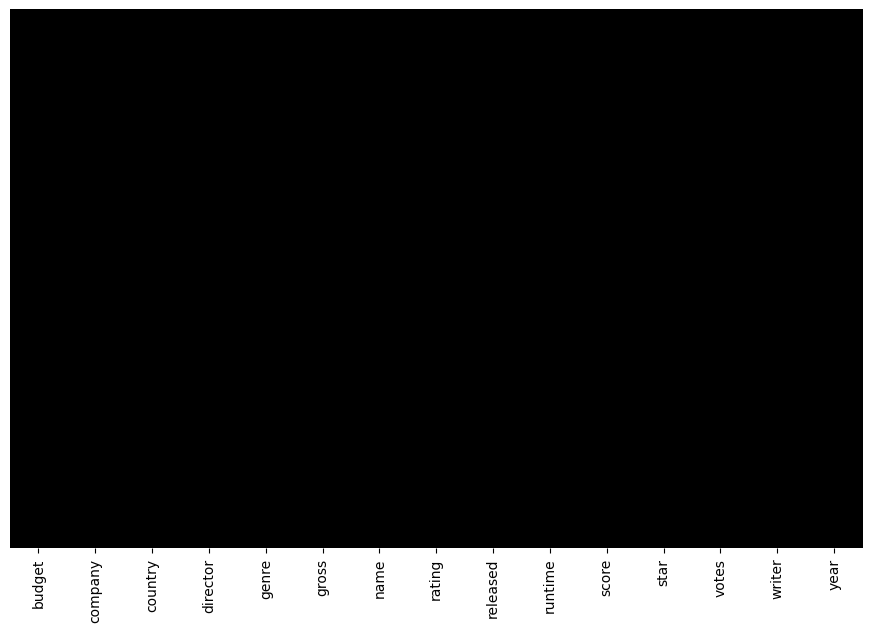

In [19]:
#Heatmap graph for missing values
sns.heatmap(df_usa.isnull(), yticklabels=False, cbar=False, cmap='gnuplot')

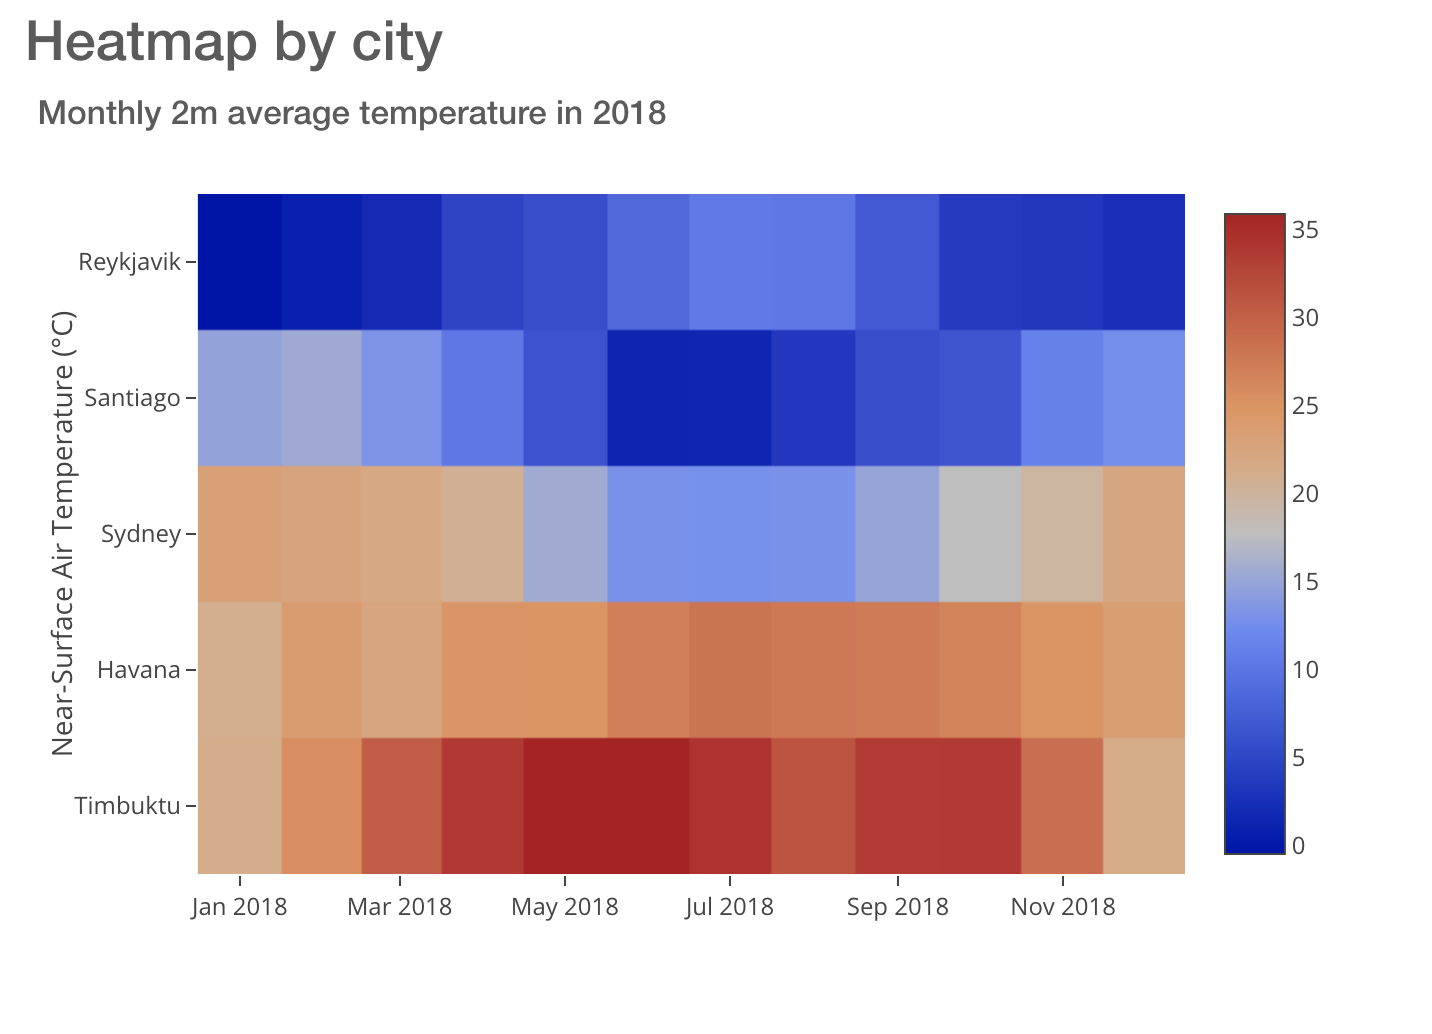

**Observation**: there is no missing data in this dataset stated as *NaN*. However, we know that we have 1,146 missing values for the budget variable.

**How to handle missing data?**
<br>In case you have missing data, here are a few techniques you can use to handle them:
1. *Remove observations(rows) with missing data*: depends on the number of missing observations that you have.
2. *Replace missing observations* with mean, median, or other proxy: this depends on what makes sense given your dataset.
3. *Erase the entire variable(column)*: this makes sense if you have too many missing observations for this variable and there is no way to could impute/replace them to provide an accurate analysis.

**A few links to help you deal with missing data**:
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html : pandas official documentation
- https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html
- https://machinelearningmastery.com/handle-missing-data-python/

Possible strategies for handling the missing budget observations:
- Choice 1 : suppress all the rows for which budget is 0
- Choice 2 : check on the Internet and enter manually the budget for each movie with missing budget.

In such a case, taking the mean of the budget would not really make much sense: as we will see later on, there is a wide dispersion of budget between movies. 
<br>Entering all the missing values would take a huge amount of time. Since  the purpose here is just to do some data visualization and exploration (and not implement a statistical model) we decide to delete the rows with 0 budget (around 24% of the df_usa dataset).

In [20]:
#Drop rows with 0 budget entry
df_usa = df_usa[df_usa['budget'] != 0] # budget == 0

In [19]:
df_usa.count() # 6820

budget      3726
company     3726
country     3726
director    3726
genre       3726
gross       3726
name        3726
rating      3726
released    3726
runtime     3726
score       3726
star        3726
votes       3726
writer      3726
year        3726
dtype: int64

In [21]:
#Check if the 0 budget films have been removed
df_usa.describe()

,budget,gross,runtime,score,votes,year
count,3.726000e+03,3.726000e+03,3726.000000,3726.000000,3.726000e+03,3726.000000
mean,3.755996e+07,5.003118e+07,106.796028,6.291975,9.845608e+04,2002.117552
std,4.058167e+07,6.763871e+07,17.302558,0.999201,1.542955e+05,8.489054
min,7.000000e+03,3.090000e+02,69.000000,1.500000,4.480000e+02,1986.000000
25%,1.100000e+07,8.684645e+06,95.000000,5.700000,1.570200e+04,1995.000000
50%,2.500000e+07,2.777787e+07,103.000000,6.400000,4.519300e+04,2002.000000
75%,5.000000e+07,6.385394e+07,115.000000,7.000000,1.141595e+05,2009.000000
max,3.000000e+08,9.366622e+08,271.000000,9.300000,1.861666e+06,2016.000000


**Observation**: minimum budget is now around 7,000$. 

In the next section we will go deeper into the analysis and start doing some data visualization.

## STEP 4: Data visualization

**Some useful websites for data visualization**:
<br>For colormaps(e.g. colour gradient): 
https://matplotlib.org/examples/color/colormaps_reference.html 
<br>For single colors (e.g. of lines, bars, ...): 
https://matplotlib.org/users/colors.html
<br> Seaborn documentation : https://seaborn.pydata.org/
<br> Matplotlib documentation: https://matplotlib.org/

### 1. Time series plot
<br>Let's look at the evolution of mean budget and mean revenue over the years.

In [22]:
#Create a time series with mean revenue and budget per year
df_usa_ts = df_usa.groupby(['year'], as_index=True)[['budget', 'gross', 'score' ]].mean() 

In [21]:
df_usa_ts

,budget,gross,score
year,,,
1986,1.245308e+07,2.333820e+07,6.227273
1987,1.262842e+07,2.795000e+07,6.131646
1988,1.364465e+07,2.561552e+07,6.280198
1989,1.547837e+07,3.501277e+07,6.338202
1990,2.101560e+07,4.286194e+07,6.265385
1991,1.986826e+07,3.326092e+07,6.248454
1992,2.079059e+07,3.446166e+07,6.363265
1993,1.932886e+07,3.412792e+07,6.285714
1994,2.545115e+07,3.539472e+07,6.168807


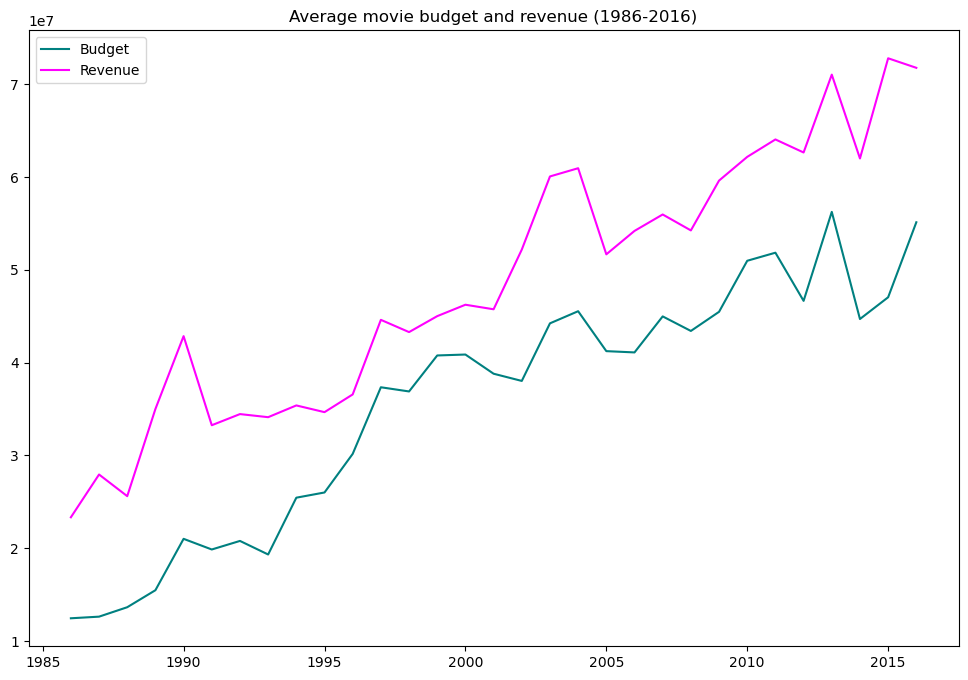

In [23]:
#Plot the time series of year, budget and revenue
plt.figure(figsize=(12,8))
plt.plot(df_usa_ts.index,df_usa_ts['budget'], label='Budget', color = 'teal')
plt.plot(df_usa_ts.index,df_usa_ts['gross'], label='Revenue', color = 'magenta')
plt.legend(loc='best')
plt.title("Average movie budget and revenue (1986-2016)")
plt.show()

**Observation**: increasing trend for both revenue and budget with a little drop in 2013.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


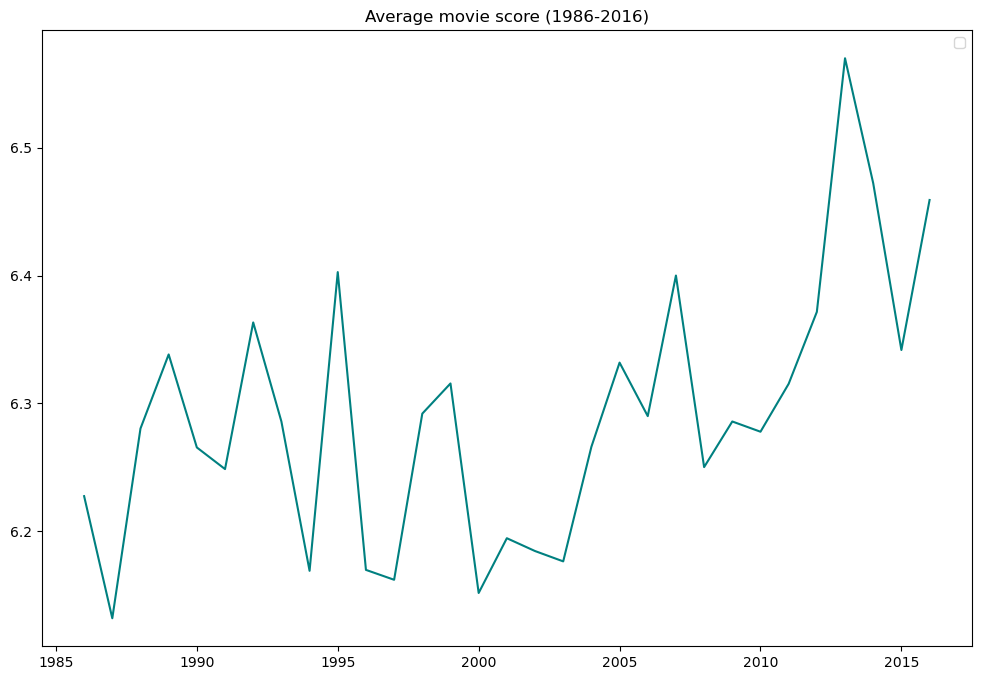

In [24]:
#Plot the time series of year and score
plt.figure(figsize=(12,8))
plt.plot(df_usa_ts.index,df_usa_ts['score'], color = 'teal')
plt.legend(loc='best')
plt.title("Average movie score (1986-2016)")
plt.show()

### 2. Relationships between variables

When exploring data, you will need to study **how your variables are related (or not) with each other**. Depending on your goal, you will articulate your relationship analysis differently.
<br>Let's suppose here that the goal is to predict movie revenue and analyse which factors have an influence on revenue. In such a case, your "pivot variable" is the variable *gross* and you will study the relationship of other variables with this one.

During this step, a good idea is to separate the analysis between categorical variables and numerical variables. You will not use the same kind of graphs or statistical tests depending on the type of your data.

#### Working with categorical variables

When dealing with categorical variables, you can use the following plots:
1. **Scatterplot**: visualize one continuous variable depending on the categorical variable.
<br>*Syntax*: *sns.stripplot(x=categorical, y=numerical, datat=dataset)*
<br>*Reference*: https://seaborn.pydata.org/generated/seaborn.stripplot.html
2. **Bar Chart** : shows comparisons among categories. One axis of the chart shows the specific categories being compared, the other axis displays the measured value.
<br>*Syntax*: *sns.barplot(x=categorical, y=numerical, hue=categorical2, data=dataset)
<br>*Reference*: https://seaborn.pydata.org/generated/seaborn.barplot.html
3. **Count Plot**: displays the number of occurrences for each category.
<br>*Syntax*: *sns.countplot(x=categorical, data = dataset, palette= color_palette)*
<br>*Reference*: https://seaborn.pydata.org/generated/seaborn.countplot.html
4. **Box Plot**: show distributions with respect to category.
<br>*Syntax*: *sns.boxplot(x=categorical, y=numerical, hue=categorical2, data=dataset)*
<br>*Reference*: https://seaborn.pydata.org/generated/seaborn.boxplot.html
5. **Violin Plot**: similar to a box plot, draws a combination of boxplot and kernel density estimate.
<br>*Syntax*: *sns.violinplot(x=categorical, y=numerical, hue=categorical2, data=dataset)*
<br>*Reference*: https://seaborn.pydata.org/generated/seaborn.violinplot.html

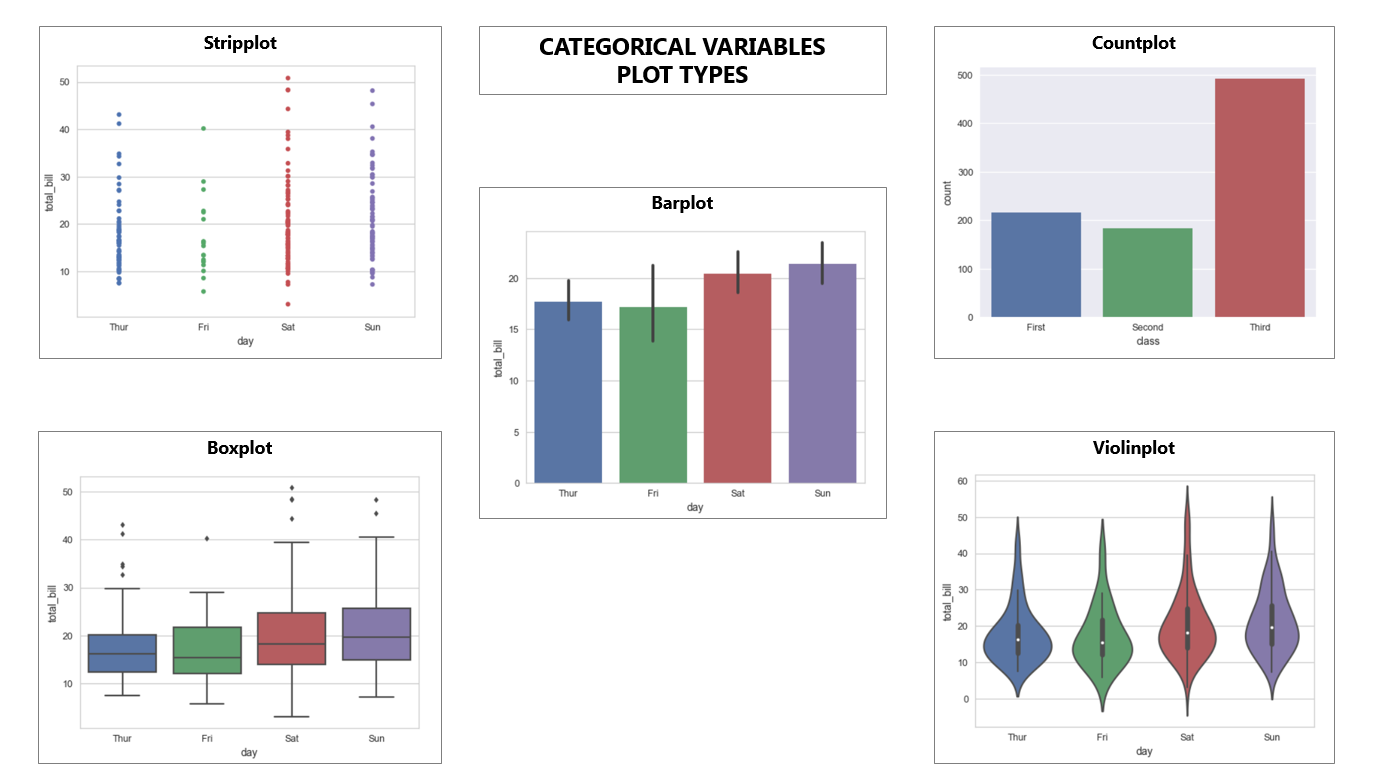

**Revenue and Genres**

In [25]:
df_usa.groupby('genre').agg({'gross': [np.mean, np.max, np.min, np.median, np.std]})

gross                                                   
                   mean         amax       amin       median           std
genre                                                                     
Action     7.108245e+07  936662225.0     1887.0   41530103.0  8.945931e+07
Adventure  6.557926e+07  408010692.0    13557.0   37936974.5  8.366845e+07
Animation  1.260203e+08  486295561.0  3442820.0  103412758.0  9.775080e+07
Biography  4.125765e+07  255959475.0     5565.0   24771549.0  4.674789e+07
Comedy     3.783909e+07  330252182.0      309.0   22772199.5  4.385727e+07
Crime      2.976864e+07  183405771.0     3045.0   17286091.0  3.529616e+07
Drama      3.287304e+07  658672302.0     1800.0   17013046.5  4.939847e+07
Family     1.109092e+07   20047715.0  2119994.0   11097990.0  7.340368e+06
Fantasy    2.483771e+07  101071502.0    69136.0   15719109.0  3.077374e+07
Horror     3.133461e+07  140539099.0     2034.0   25117498.0  2.899687e+07
Musical    4.475700e+04      44757.0    44757.0      44757.0           NaN
Mystery    5.600955e+07  217536138.0    68877.0   41704230.0  5.436225e+07
Romance    3.111224e+07   62495645.0  3478370.0   27362712.0  2.968676e+07
Sci-Fi     2.233231e+07   64575175.0   192816.0   14559943.0  2.528630e+07
Thriller   6.468732e+06   29381956.0     1785.0    1534569.0  1.058131e+07

In [23]:
df_usa.groupby('genre').agg({'gross': [np.mean, max, min, np.median, np.std]})

gross                                                   
                   mean          max        min       median           std
genre                                                                     
Action     7.108245e+07  936662225.0     1887.0   41530103.0  8.945931e+07
Adventure  6.557926e+07  408010692.0    13557.0   37936974.5  8.366845e+07
Animation  1.260203e+08  486295561.0  3442820.0  103412758.0  9.775080e+07
Biography  4.125765e+07  255959475.0     5565.0   24771549.0  4.674789e+07
Comedy     3.783909e+07  330252182.0      309.0   22772199.5  4.385727e+07
Crime      2.976864e+07  183405771.0     3045.0   17286091.0  3.529616e+07
Drama      3.287304e+07  658672302.0     1800.0   17013046.5  4.939847e+07
Family     1.109092e+07   20047715.0  2119994.0   11097990.0  7.340368e+06
Fantasy    2.483771e+07  101071502.0    69136.0   15719109.0  3.077374e+07
Horror     3.133461e+07  140539099.0     2034.0   25117498.0  2.899687e+07
Musical    4.475700e+04      44757.0    44757.0      44757.0           NaN
Mystery    5.600955e+07  217536138.0    68877.0   41704230.0  5.436225e+07
Romance    3.111224e+07   62495645.0  3478370.0   27362712.0  2.968676e+07
Sci-Fi     2.233231e+07   64575175.0   192816.0   14559943.0  2.528630e+07
Thriller   6.468732e+06   29381956.0     1785.0    1534569.0  1.058131e+07

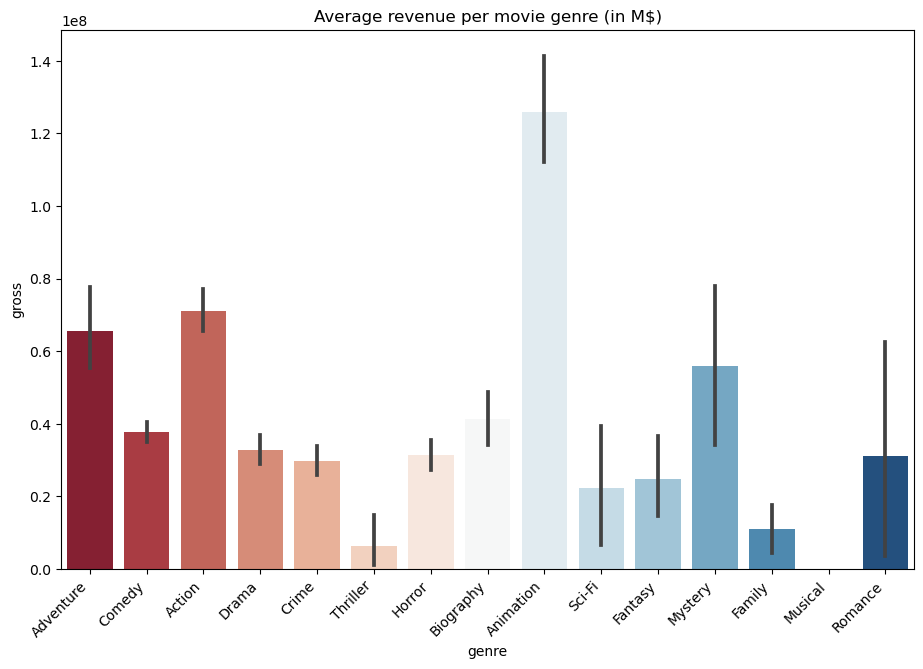

In [26]:
#Plot 1: barplot of revenue and genres
sns.barplot(x='genre',
            y='gross',
            data=df_usa,
            palette='RdBu')
plt.title('Average revenue per movie genre (in M$)')
plt.xticks(rotation=45,ha="right")
plt.show()

**Observation**: there seems to be only one observation for "Musical" genre.

In [27]:
#Check the number of observations for "Musical"
df_usa[df_usa['genre'] == 'Musical'].count()

budget      1
company     1
country     1
director    1
genre       1
gross       1
name        1
rating      1
released    1
runtime     1
score       1
star        1
votes       1
writer      1
year        1
dtype: int64

**Conclusion**: as there is only one observation for the genre "Musical", we decide to remove it from the dataset.

In [28]:
df_usa = df_usa[df_usa['genre'] != 'Musical']

In [29]:
df_usa

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,4000000.0,Blumhouse Productions,USA,Greg McLean,Horror,10732841.0,The Darkness,PG-13,2016-05-13,92,4.4,Kevin Bacon,9450,Greg McLean,2016
6809,3800000.0,Sycamore Pictures,USA,John Krasinski,Comedy,1016872.0,The Hollars,PG-13,2016-08-26,88,6.5,Sharlto Copley,7227,Jim Strouse,2016
6811,8500000.0,CBS Films,USA,Steve Carr,Animation,19985196.0,Middle School: The Worst Years of My Life,PG,2016-10-07,92,6.1,Griffin Gluck,4556,Chris Bowman,2016
6814,20000000.0,LD Entertainment,USA,Kevin Reynolds,Action,36874745.0,Risen,PG-13,2016-02-19,107,6.3,Joseph Fiennes,19084,Kevin Reynolds,2016


In [ ]:
#Plot 2: boxplot of revenue and genres

In [30]:
df_usa.count()

budget      3725
company     3725
country     3725
director    3725
genre       3725
gross       3725
name        3725
rating      3725
released    3725
runtime     3725
score       3725
star        3725
votes       3725
writer      3725
year        3725
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Adventure'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Drama'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Thriller'),
  Text(6, 0, 'Horror'),
  Text(7, 0, 'Biography'),
  Text(8, 0, 'Animation'),
  Text(9, 0, 'Sci-Fi'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Mystery'),
  Text(12, 0, 'Family'),
  Text(13, 0, 'Romance')])

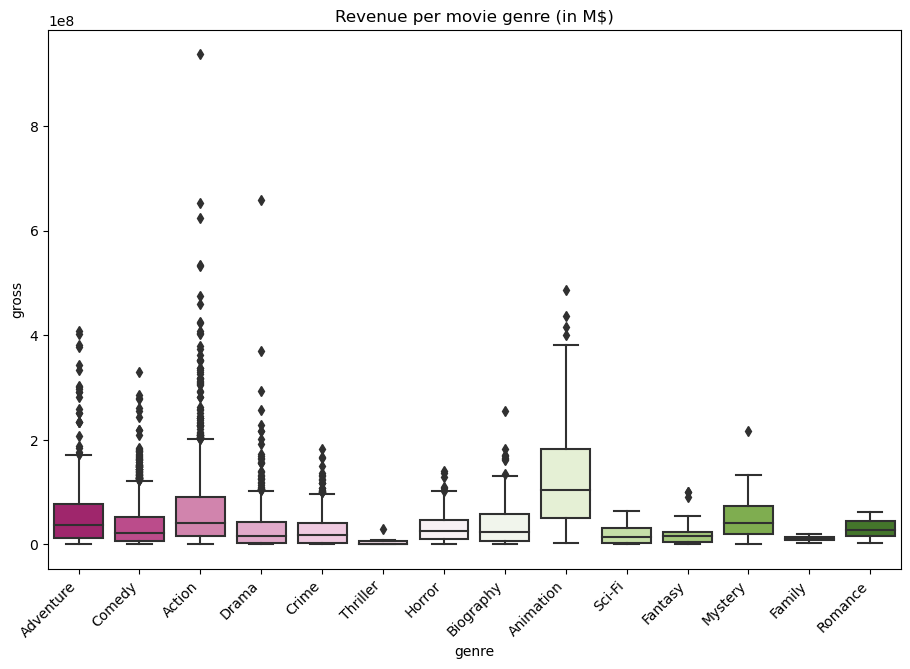

In [31]:
sns.boxplot(x='genre',
            y='gross',
            data=df_usa,
            palette='PiYG')
plt.title('Revenue per movie genre (in M$)')
plt.xticks(rotation=45,ha="right")
#plt.show()

**Relationships between two categorical variables**

You may want to look at the relationships between two categorical variables. In such case, **crosstab** and **stacked barplots** are used.

**Genre and Rating**

**Motion Picture Association of American film rating system**:
<br>
- G : General Audiences
- PG : Parental Guidance Suggested
- PG-13 : Parents Strongly Cautioned. Some material may be inappropriate for children under 13.
- R : R-Restricted. Under 17 requires accompanying parent or adult guardian.
- NC-17 : Adults only. No one 17 and under admitted.
<br>For more information, see https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system

In [32]:
#Create a crosstab showing rating repartition by genre
tab=pd.crosstab(df_usa['rating'], df_usa['genre'])
tab

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
rating,,,,,,,,,,,,,,
G,0,8,52,0,8,0,3,1,0,0,0,0,0,0
NC-17,0,0,0,0,3,1,1,0,0,0,0,0,0,0
NOT RATED,0,1,0,1,4,1,5,0,0,0,1,0,0,0
Not specified,0,0,0,0,0,0,1,0,0,0,0,0,0,0
PG,79,97,116,21,189,0,40,3,2,1,0,0,0,1
PG-13,409,63,8,47,455,32,229,0,3,44,9,3,7,0
R,404,53,5,86,482,253,299,0,20,144,12,0,1,6
UNRATED,0,0,0,1,5,1,4,0,0,0,0,0,0,0


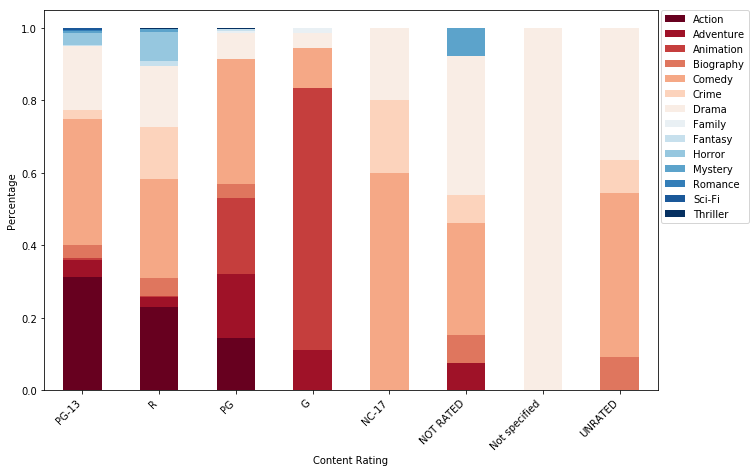

In [29]:
#Create a stacked graph displaying the repartition of genre per content rating
tab.div(tab.sum(1).astype(float), axis=0).sort_values(by='Action', ascending=False).plot(kind='bar', stacked=True, cmap="RdBu")
plt.xlabel("Content Rating")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45,ha="right")
plt.show()

**Observation**: "NOT RATED" and "UNRATED" should be regrouped into one single category "UNRATED"

In [33]:
df_usa['rating'] = np.where(df_usa['rating'] == 'NOT RATED' ,'UNRATED' , df_usa['rating'])

**Rating and Revenue**

In [34]:
df_usa.groupby('rating').agg({'gross': [np.mean, max, min, np.median, np.std]})

gross                                                  
                       mean          max        min      median           std
rating                                                                       
G              1.070111e+08  415004880.0  2119994.0  87319482.0  9.084392e+07
NC-17          2.094889e+06    4602512.0   582024.0   1950218.0  1.514696e+06
Not specified  2.691899e+06    2691899.0  2691899.0   2691899.0           NaN
PG             6.992501e+07  486295561.0    43671.0  45290318.0  7.541152e+07
PG-13          6.562071e+07  936662225.0      309.0  38518613.0  8.318339e+07
R              3.081202e+07  370782930.0     1434.0  16779636.0  3.979910e+07
UNRATED        1.191911e+06    8025872.0     5565.0    416951.0  2.122422e+06

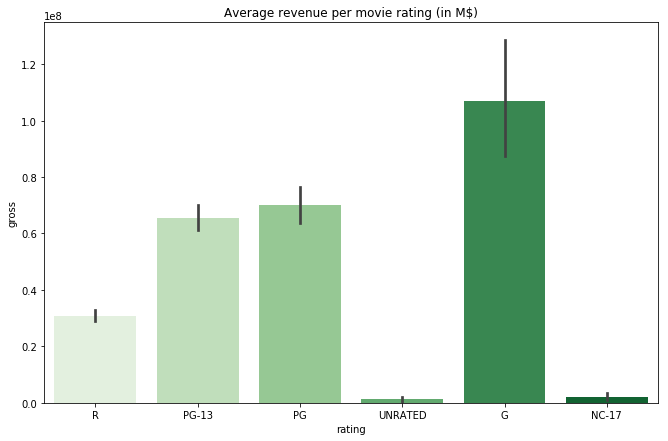

In [35]:
#Plot 1: Barplot
sns.barplot(x='rating',
            y='gross',
            data=df_usa,
            palette='Greens')
plt.title('Average revenue per movie rating (in M$)')
plt.show()

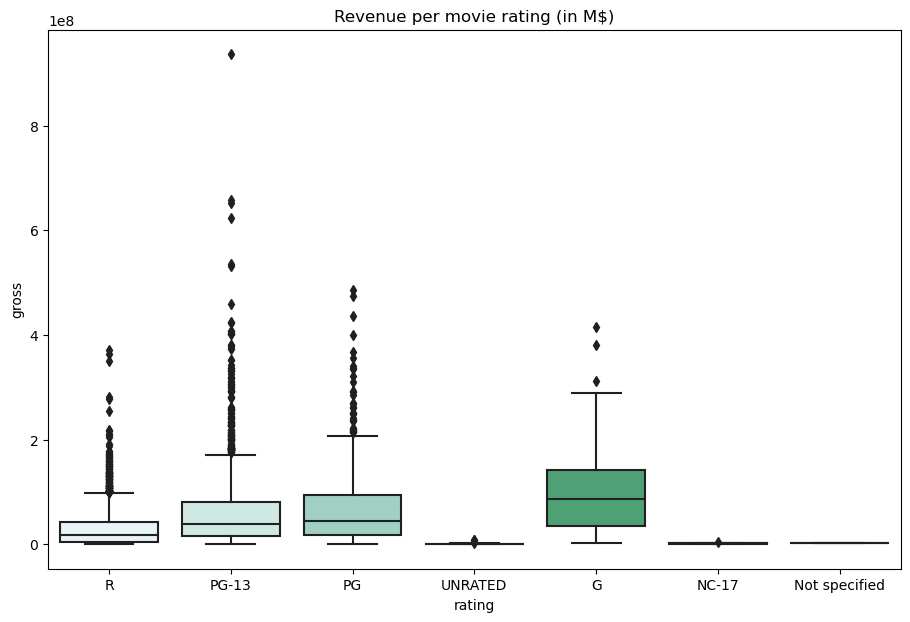

In [35]:
#Plot 2 : Boxplot
sns.boxplot(x='rating',
            y='gross',
            data=df_usa,
            palette='BuGn')
plt.title('Revenue per movie rating (in M$)')
plt.show()

**Release month and revenue**
<br>We might wonder if the month of release of the movie has an impact on its revenue. Let's look at the relationship between these two variables.

In [36]:
#Create the release month variable
df_usa['Mth_rld']=pd.DatetimeIndex(df_usa['released']).month

In [43]:
#Summary statistics of revenue per Release month
df_usa.groupby('Mth_rld').agg({'gross': [np.mean, max, min, np.median, np.std]})

gross                                                
                 mean          max      min      median           std
Mth_rld                                                              
1        3.216701e+07  350126372.0   1887.0  20454672.5  3.670169e+07
2        3.573138e+07  370782930.0  17061.0  22754725.0  4.370759e+07
3        4.661983e+07  408010692.0   1800.0  27457409.0  5.891469e+07
4        3.055976e+07  353007020.0   5565.0  19363565.0  3.869585e+07
5        7.842181e+07  623357910.0   5176.0  37390766.0  1.034787e+08
6        8.782217e+07  652270625.0   1434.0  65097091.0  9.048367e+07
7        6.924928e+07  534858444.0   3045.0  43346866.0  7.893424e+07
8        3.916033e+07  333176600.0   2760.0  23495922.0  4.805331e+07
9        2.748984e+07  169700110.0   9168.0  17600000.0  3.115836e+07
10       2.913617e+07  167767189.0    309.0  18300124.0  3.190512e+07
11       5.950534e+07  424668047.0   2964.0  31331001.0  7.363973e+07
12       7.286408e+07  936662225.0   6319.0  51465008.5  9.144366e+07

**Observation**: on average, movies released in May-June seem to have higher revenue.

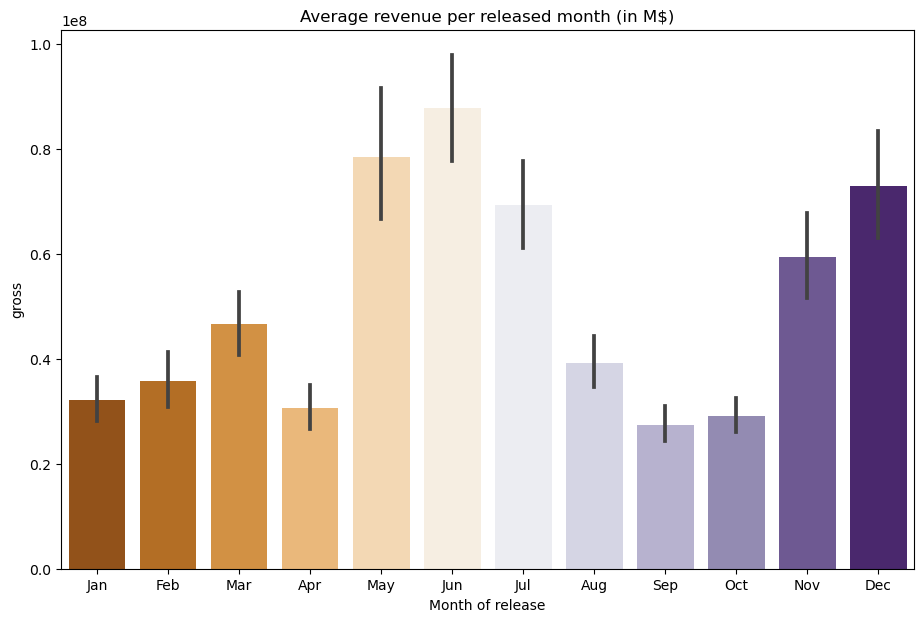

In [37]:
#Plot 1 : Barplot
#We create a list with Month names to display the months as words, not as numbers. 
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#Plot the graph
ax = sns.barplot(x='Mth_rld',
            y='gross',
            data=df_usa,
            palette='PuOr')
ax.set_xticklabels(labels)
plt.title('Average revenue per released month (in M$)')
plt.xlabel('Month of release')
plt.show()

**Observation**: as said previously, movies released in May, June, July and November-December tend to have a higher revenue.

**Company and Revenue**
<br>Is there any relationship between the production company and the movie revenue ?

In [38]:
#Before digging into visualization, let's explore further the "company" variable
df_usa['company'].describe()

count             3725
unique             983
top       Warner Bros.
freq               223
Name: company, dtype: object

**Observation**: 983 different company names. For analysis and visualization purpose, we decide to classify the companies into 9 groups: 8 major Studios and Other studios
<br>We define the 7 major Studios as below:
- Warner Bros.
- Walt Disney
- 20th Century Fox
- Paramount Pictures
- Universal
- Columbia Pictures (will include Sony Pictures as it is part of the same company)
- Lionsgate
- Metro-Goldwyn-Mayer (mini-major studio)
<br>We first take a look at each major studio individually as we expect some spelling differences (e.g. Warner Bros., Warner Bros. Animation, ...)

In [39]:
# 1) WARNER BROS
df_usa[df_usa['company'].str.contains('Warner Bros')]['company'].value_counts()

Warner Bros.                         223
Warner Bros. Animation                 2
Warner Bros. Family Entertainment      1
Warner Bros. Digital Distribution      1
Name: company, dtype: int64

**Observation**: four different names for Warner Bros. company. We classify everything as Warner Bros.

In [40]:
#Align company names for Warner Bros.
df_usa['company'] = np.where(df_usa['company'].str.contains('Warner Bros'), 'Warner Bros.', df_usa['company'])

In [41]:
#Check the name
df_usa[df_usa['company'].str.contains('Warner Bros')]['company'].value_counts()

Warner Bros.    227
Name: company, dtype: int64

In [42]:
# 2) WALT DISNEY
df_usa[df_usa['company'].str.contains('Walt')]['company'].value_counts()

Walt Disney Pictures                     84
Walt Disney Animation Studios             7
Walt Disney Feature Animation             5
Walt Disney Feature Animation Florida     2
Name: company, dtype: int64

In [43]:
#Align company names for Walt Disney
df_usa['company'] = np.where(df_usa['company'].str.contains('Walt'), 'Walt Disney', df_usa['company'])

In [44]:
#Check the name
df_usa[df_usa['company'].str.contains('Walt Disney')]['company'].value_counts()

Walt Disney    98
Name: company, dtype: int64

In [45]:
#3) 20th CENTURY FOX
df_usa[df_usa['company'].str.contains('Century')]['company'].value_counts()
df_usa[df_usa['company'].str.contains('Fox')]['company'].value_counts()

Twentieth Century Fox Film Corporation    160
Fox 2000 Pictures                          50
Fox Searchlight Pictures                   35
Twentieth Century Fox Animation             7
Fox Atomic                                  7
Name: company, dtype: int64

In [46]:
#Align company names for 20th Century Fox
df_usa['company'] = np.where(df_usa['company'].str.contains('Century'), '20th Century Fox', df_usa['company'])
df_usa['company'] = np.where(df_usa['company'].str.contains('Fox'), '20th Century Fox', df_usa['company'])

In [47]:
#Check the name
df_usa[df_usa['company'].str.contains('20th Century Fox')]['company'].value_counts()

20th Century Fox    262
Name: company, dtype: int64

In [48]:
#4) PARAMOUNT PICTURES
df_usa[df_usa['company'].str.contains('Paramount')]['company'].value_counts() 

Paramount Pictures     200
Paramount Vantage        8
Paramount Classics       1
Paramount Animation      1
Name: company, dtype: int64

In [49]:
#Align company names for Paramount Pictures
df_usa['company'] = np.where(df_usa['company'].str.contains('Paramount'), 'Paramount Pictures', df_usa['company'])

In [50]:
#Check the name
df_usa[df_usa['company'].str.contains('Paramount Pictures')]['company'].value_counts()

Paramount Pictures    210
Name: company, dtype: int64

In [51]:
#5) UNIVERSAL
df_usa[df_usa['company'].str.contains('Universal')]['company'].value_counts() 

Universal Pictures        217
Universal City Studios      1
Name: company, dtype: int64

In [52]:
#Align company names for Universal
df_usa['company'] = np.where(df_usa['company'].str.contains('Universal'), 'Universal', df_usa['company'])

In [53]:
#Check the name
df_usa[df_usa['company'].str.contains('Universal')]['company'].value_counts()

Universal    218
Name: company, dtype: int64

In [54]:
#6) COLUMBIA PICTURES
df_usa[df_usa['company'].str.contains('Columbia')]['company'].value_counts() 

Columbia Pictures Corporation    127
Columbia Pictures                 97
Columbia Pictures Industries       2
Columbia TriStar Home Video        1
Name: company, dtype: int64

In [55]:
#We also said above that Sony Pictures is part of Columbia Pictures. 
#Hence we will also categorize it as "Columbia Pictures"
df_usa[df_usa['company'].str.contains('Sony')]['company'].value_counts() 

Sony Pictures Classics               3
Sony Pictures Entertainment (SPE)    1
Name: company, dtype: int64

In [56]:
#Align company names for Columbia Pictures
df_usa['company'] = np.where(df_usa['company'].str.contains('Sony'), 'Columbia Pictures', df_usa['company'])
df_usa['company'] = np.where(df_usa['company'].str.contains('Columbia'), 'Columbia Pictures', df_usa['company'])

In [57]:
#Check the name
df_usa[df_usa['company'].str.contains('Columbia Pictures')]['company'].value_counts()

Columbia Pictures    231
Name: company, dtype: int64

In [58]:
#7) LIONSGATE
df_usa[df_usa['company'].str.contains('Lion')]['company'].value_counts() 

Lionsgate                          33
Lions Gate Films                   13
Lions Gate Family Entertainment     1
Name: company, dtype: int64

In [59]:
#Align company names for Lionsgate
df_usa['company'] = np.where(df_usa['company'].str.contains('Lion'), 'Lionsgate', df_usa['company'])

In [60]:
#Check the names
df_usa[df_usa['company'].str.contains('Lion')]['company'].value_counts() 

Lionsgate    47
Name: company, dtype: int64

In [61]:
#8) METRO-GOLDWYN-MAYER (MGM)
df_usa[df_usa['company'].str.contains('Metro')]['company'].value_counts() 

Metro-Goldwyn-Mayer (MGM)    70
Name: company, dtype: int64

In [62]:
#Rename this studio as "MGM" for simplicity
df_usa['company'] = np.where(df_usa['company'].str.contains('Metro'), 'MGM', df_usa['company'])

In [63]:
#Check names
df_usa[df_usa['company'].str.contains('MGM')]['company'].value_counts() 

MGM    70
Name: company, dtype: int64

In [64]:
#Create a list with the name of the major studios
major_studios = ['Warner Bros.', 'Walt Disney', '20th Century Fox', 'MGM', 'Paramount Pictures',
                'Columbia Pictures', 'Universal', 'Lionsgate']

In [65]:
#Classify the remaining companies as "Other Studios"
df_usa['company'] = np.where(df_usa['company'].isin(major_studios), df_usa['company'], 'Other Studios')

In [66]:
#Check if the classification has been properly done
df_usa['company'].value_counts()

Other Studios         2362
20th Century Fox       262
Columbia Pictures      231
Warner Bros.           227
Universal              218
Paramount Pictures     210
Walt Disney             98
MGM                     70
Lionsgate               47
Name: company, dtype: int64

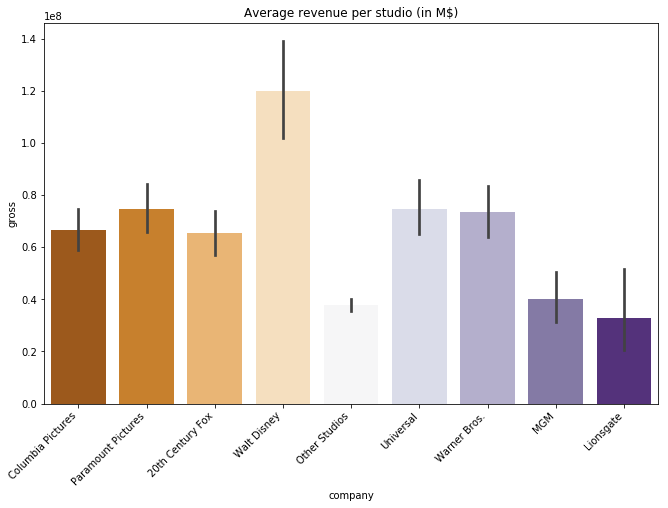

In [82]:
#Plot 1 : Barplot of Revenue by company 
sns.barplot(x='company',
            y='gross',
            data=df_usa,
            palette='PuOr')
plt.title('Average revenue per studio (in M$)')
plt.xticks(rotation=45,ha="right")
plt.show()

**Observations**:
- Walt Disney shows the highest average revenue. Coherent with the genres: animation is the genre that is associated with the highest revenues.
- There is a net difference between the major studios and the "Other Studios" categories, except for MGM and Lionsgate, usually classified as "mini-major studios", which can explain the difference with the other 6 major studios.

In [67]:
#Let's look at the repartition of genres by studio
tab1=pd.crosstab(df_usa['company'], df_usa['genre'])
tab1

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
company,,,,,,,,,,,,,,
20th Century Fox,73,23,19,10,89,4,34,0,0,7,0,1,1,1
Columbia Pictures,75,14,11,14,56,16,35,0,0,6,4,0,0,0
Lionsgate,10,2,1,2,11,5,10,0,0,6,0,0,0,0
MGM,17,5,0,0,28,4,14,0,0,2,0,0,0,0
Other Studios,480,119,86,106,764,208,407,3,18,146,12,1,6,6
Paramount Pictures,66,14,10,3,59,19,24,0,4,9,2,0,0,0
Universal,65,12,5,14,79,9,20,1,2,7,3,1,0,0
Walt Disney,19,20,36,4,18,0,1,0,0,0,0,0,0,0
Warner Bros.,87,13,13,3,42,23,37,0,1,6,1,0,1,0


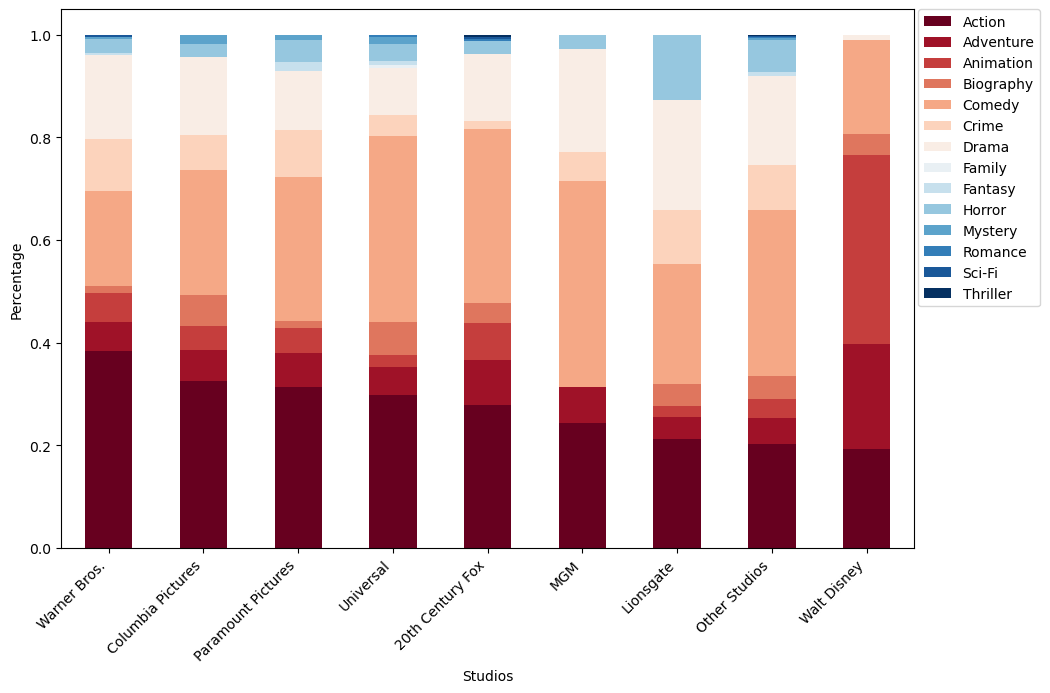

In [68]:
#Create a stacked graph displaying the repartition of genre by studio
tab1.div(tab1.sum(1).astype(float), axis=0).sort_values(by='Action', ascending=False).plot(kind='bar', stacked=True, cmap="RdBu")
plt.xlabel("Studios")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45,ha="right")
plt.show()

#### Relationships between numerical variables

**Best Practice advice 3**: to get an overview of the relationships between your numerical variables, use a heatmap to plot correlation coefficients.

C:\Users\KUDACHE'S\AppData\Local\Temp\ipykernel_9452\857855433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_usa.corr(),


<Axes: >

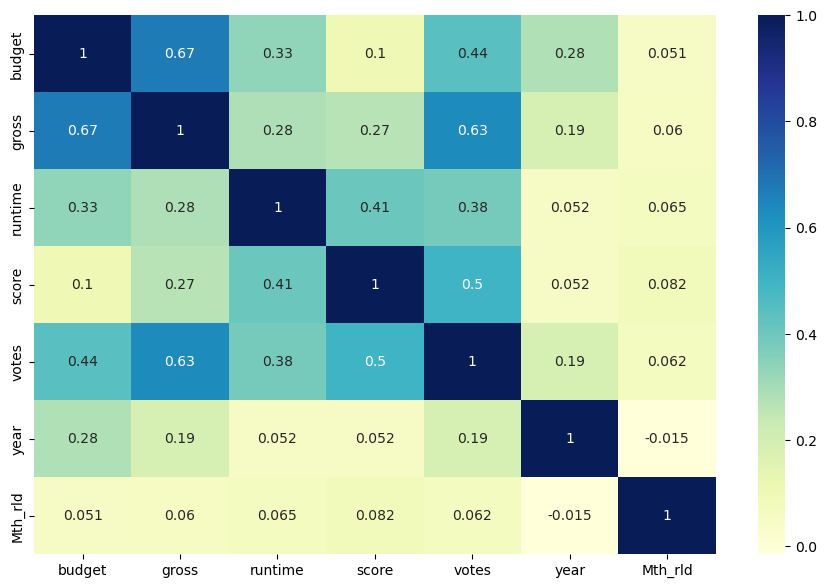

In [69]:
#Plot 1: Correlation between all numerical variables ==> HEATMAP
sns.heatmap(df_usa.corr(),
            annot=True,
            cmap='YlGnBu')

**Observations**:
- fairly high correlation between budget and gross.
- gross and votes also display some noticeable positive correlation.
- none of the numerical variables are highly correlated with each other (no score above 0.75) so we could include all of them in a regression model.

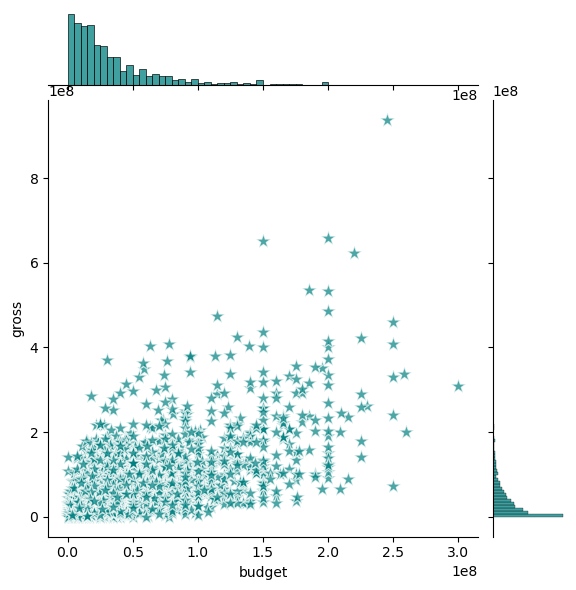

In [70]:
#Plot 2 : Budget and revenue ==> scatterplot
sns.jointplot(x='budget', y='gross', data=df_usa, marker='*', color='teal', alpha=0.7, s=124)
plt.show()

**Observation**: Both revenue and budget have left skewed distributions 

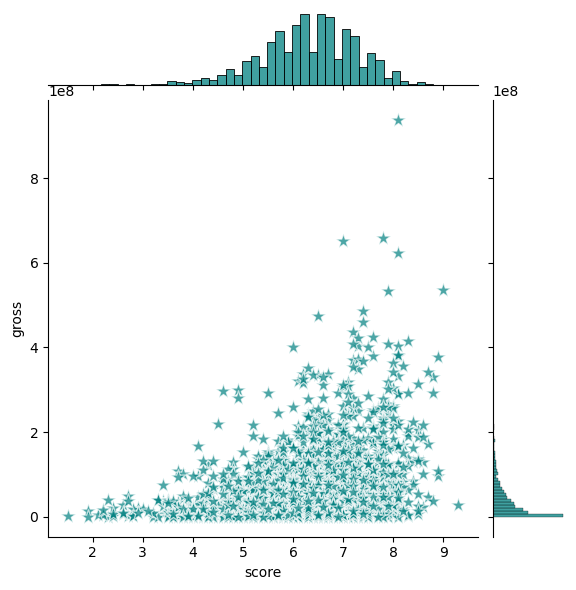

In [71]:
# Plot 3 : revenue and score
sns.jointplot(x='score', y='gross', data=df_usa, marker='*', color='teal', alpha=0.7, s=124)
plt.show()

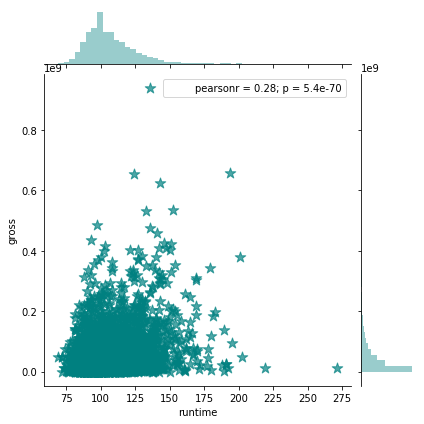

In [98]:
# Plot 4 : revenue and runtime
sns.jointplot(x='runtime', y='gross', data=df_usa, marker='*', color='teal', alpha=0.7, s=124)
plt.show()

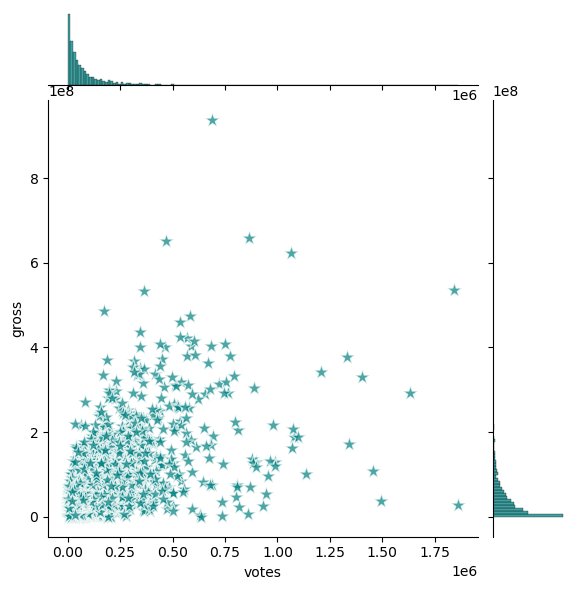

In [72]:
# Plot 5 : revenue and votes
sns.jointplot(x='votes', y='gross', data=df_usa, marker='*', color='teal', alpha=0.7, s=124)
plt.show()